In [1]:
import os
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = YOLO('trained_models/saved_model.pt')
model.info()

Model summary: 225 layers, 3,019,233 parameters, 0 gradients, 8.2 GFLOPs


(225, 3019233, 0, 8.2393088)

In [3]:
# Specify the folder containing the images
test_folder = '../../../Dataset/GTSRB/Test'

### Randomly select 1 image from Test folder


0: 608x640 1 Yield, 38.1ms
Speed: 1.0ms preprocess, 38.1ms inference, 0.5ms postprocess per image at shape (1, 3, 608, 640)


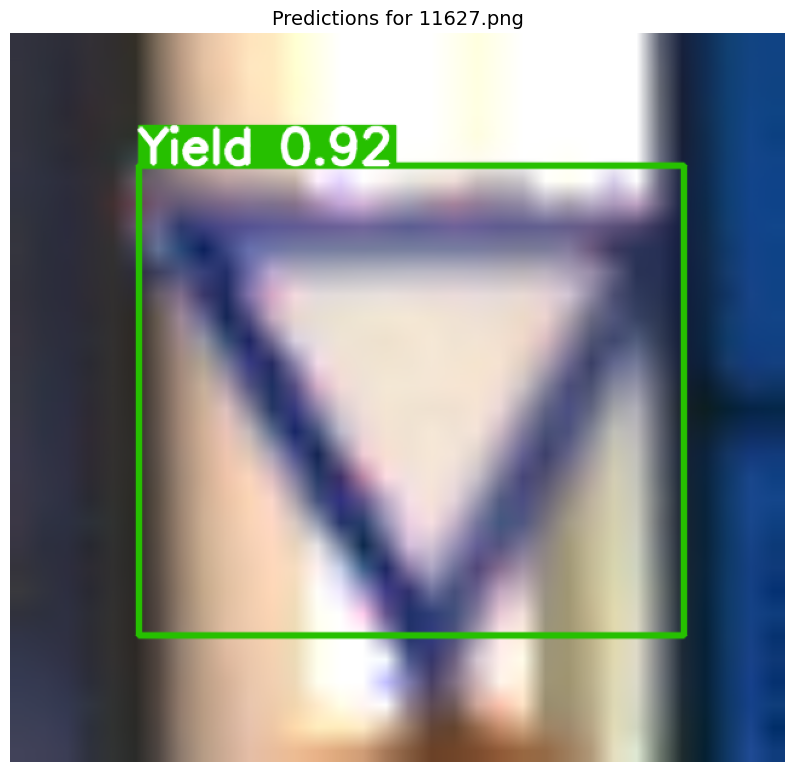

Predicted classes for the image: ['Yield']


In [4]:
# Get a list of all image files in the test folder
image_files = [f for f in os.listdir(test_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select one image
selected_image = random.choice(image_files)

# Initialize a list to store all predicted class names
all_predicted_classes = []

# Load the image
image_path = os.path.join(test_folder, selected_image)
image = cv2.imread(image_path)

# Resize the image while maintaining aspect ratio
height, width = image.shape[:2]
max_dim = max(height, width)
scale_factor = 640 / max_dim  # Standard YOLO input size
new_size = (int(width * scale_factor), int(height * scale_factor))
resized_image = cv2.resize(image, new_size, interpolation=cv2.INTER_LINEAR)
resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying

# Perform prediction
results = model(resized_image)

# Extract predicted class names from the results
predicted_classes = [model.names[int(box.cls)] for box in results[0].boxes]  # Use model.names for class mapping
all_predicted_classes.extend(predicted_classes)  # Append to the list of all predictions

# Annotate the image with the model's predictions
annotated_image = results[0].plot(line_width=4)  # Adjust font size and line width

# Ensure compatibility with matplotlib by converting from BGR to RGB (if needed)
if isinstance(annotated_image, np.ndarray):
    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Create a figure for plotting
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.title(f"Predictions for {selected_image}", fontsize=14)  # Adjust title font size
plt.axis("off")
plt.show()

# Print all predicted class names
print("Predicted classes for the image:", all_predicted_classes)


### Randomly select 5 images from Test folder


0: 608x640 1 General caution, 49.2ms
Speed: 0.8ms preprocess, 49.2ms inference, 0.6ms postprocess per image at shape (1, 3, 608, 640)

0: 640x640 1 Speed limit (80km/h), 36.5ms
Speed: 0.7ms preprocess, 36.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Ahead only, 36.3ms
Speed: 0.9ms preprocess, 36.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed limit (70km/h), 35.3ms
Speed: 0.9ms preprocess, 35.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 No passing, 36.1ms
Speed: 1.0ms preprocess, 36.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


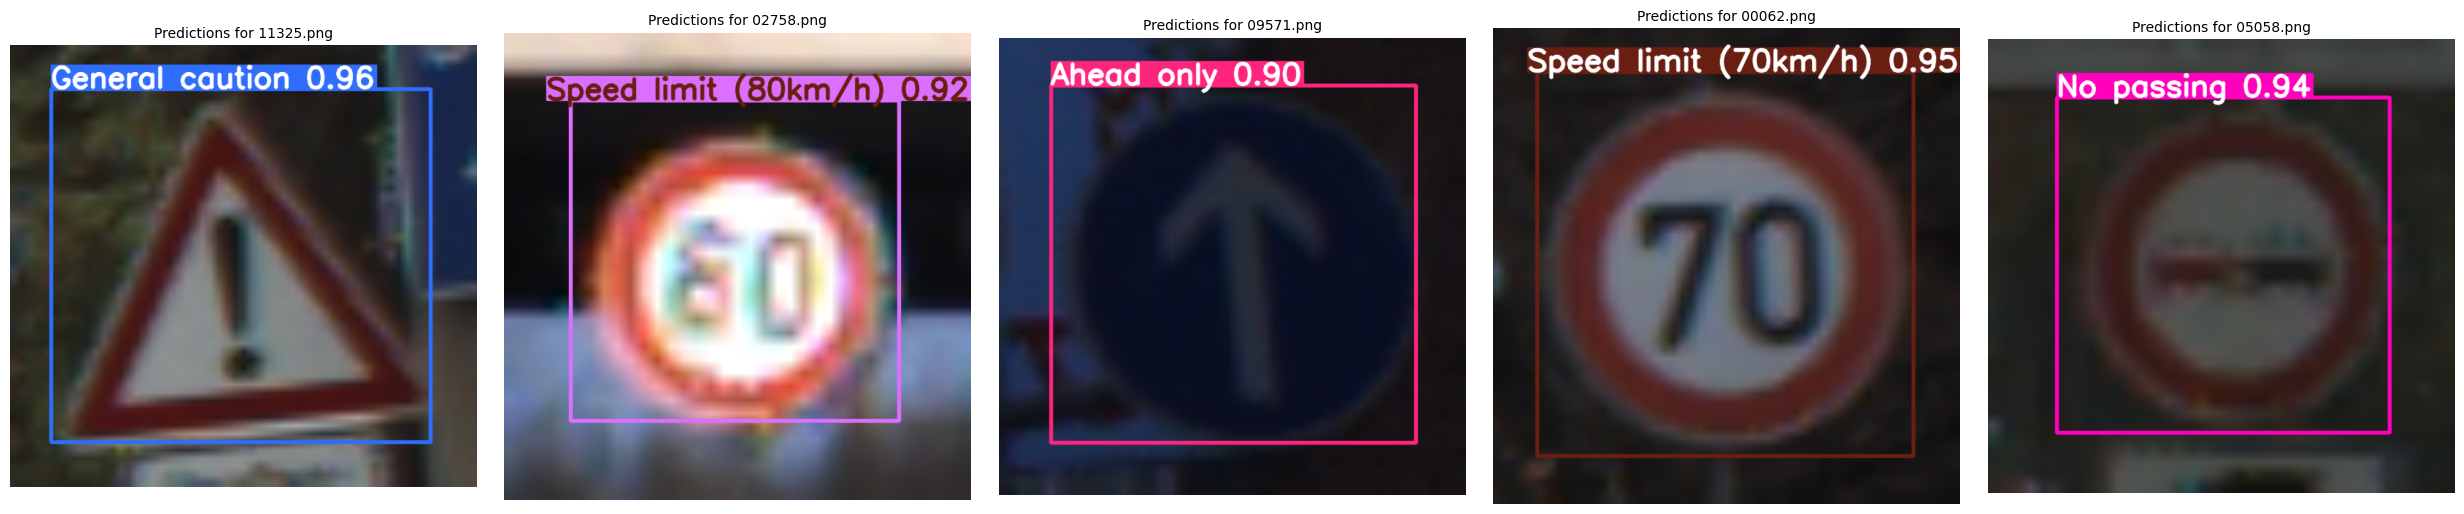

In [5]:
# Get a list of all image files in the test folder
image_files = [f for f in os.listdir(test_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select 5 images
selected_images = random.sample(image_files, 5)

# Create a figure for plotting
fig, axes = plt.subplots(1, len(selected_images), figsize=(25, 10))  # Adjust size for clarity

for i, image_file in enumerate(selected_images):
    # Load the image
    image_path = os.path.join(test_folder, image_file)
    image = cv2.imread(image_path)
    
    # Resize the image while maintaining aspect ratio
    height, width = image.shape[:2]
    max_dim = max(height, width)
    scale_factor = 640 / max_dim  # Standard YOLO input size
    new_size = (int(width * scale_factor), int(height * scale_factor))
    resized_image = cv2.resize(image, new_size, interpolation=cv2.INTER_LINEAR)
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying
    
    # Perform prediction
    results = model(resized_image)
    
    # Annotate the image with the model's predictions
    annotated_image = results[0].plot(line_width=4)  # Adjust font size and line width
    
    # Display the image in the console
    axes[i].imshow(annotated_image)
    axes[i].set_title(f"Predictions for {image_file}", fontsize=10)  # Adjust title font size
    axes[i].axis("off")

plt.tight_layout(pad=2.0)  # Add padding for better spacing
plt.show()